In [5]:
from model import *
from data import *

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'datasets/data4/train','image','label',data_gen_args,save_to_dir = 'datasets/data4/train/aug',
                        target_size = (256,256),image_color_mode = 'rgb')
model = unetNorm(input_size = (256,256,3),pretrained_weights = 'models/unet_lung1_data4.hdf5')
model_checkpoint = ModelCheckpoint('models/unet_lung1_data4.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=20,callbacks=[model_checkpoint])

/home/nbuser/Medical_Imaging/model.py:177: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/20
Found 583 images belonging to 1 classes.
Found 583 images belonging to 1 classes.
200/200 [==============================] - 1525s 8s/step - loss: 0.2704 - acc: 0.9890

Epoch 00001: loss improved from inf to 0.27040, saving model to models/unet_lung1_data4.hdf5
Epoch 2/20
200/200 [==============================] - 1494s 7s/step - loss: 0.2514 - acc: 0.9917

Epoch 00002: loss improved from 0.27040 to 0.25146, saving model to models/unet_lung1_data4.hdf5
Epoch 3/20
200/200 [==============================] - 1495s 7s/step - loss: 0.2345 - acc: 0.9915

Epoch 00003: loss improved from 0.25146 to 0.23455, saving model to models/unet_lung1_data4.hdf5
Epoch 4/20
200/200 [==============================] - 1494s 7s/step - loss: 0.2203 - acc: 0.9920

Epoch 00004: loss improved from 0.23455 to 0.22033, saving model to models/unet_lung1_data4.hdf5
Epoch 5/20
200/200 [==============================] - 1508s 8s/step - loss: 0.2044 - acc: 0.9930

Epoch 00005: loss improved from 0.22033 to 0

In [7]:
#Train on aug data
#imgs_train,imgs_mask_train = geneTrainNpy("data4/train/aug/","data4/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

In [3]:
testGene = testGenerator("datasets/data4/test/image",target_size = (256,256),as_gray = False,
                        flag_multi_class = True)
model = unetNorm(input_size = (256,256,3))
model.load_weights("models/unet_lung1_data4.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("datasets/data4/test/label",results)

/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 36s 1s/step


/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: datasets/data4/test/label/3_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: datasets/data4/test/label/4_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: datasets/data4/test/label/5_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: datasets/data4/test/label/6_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaco

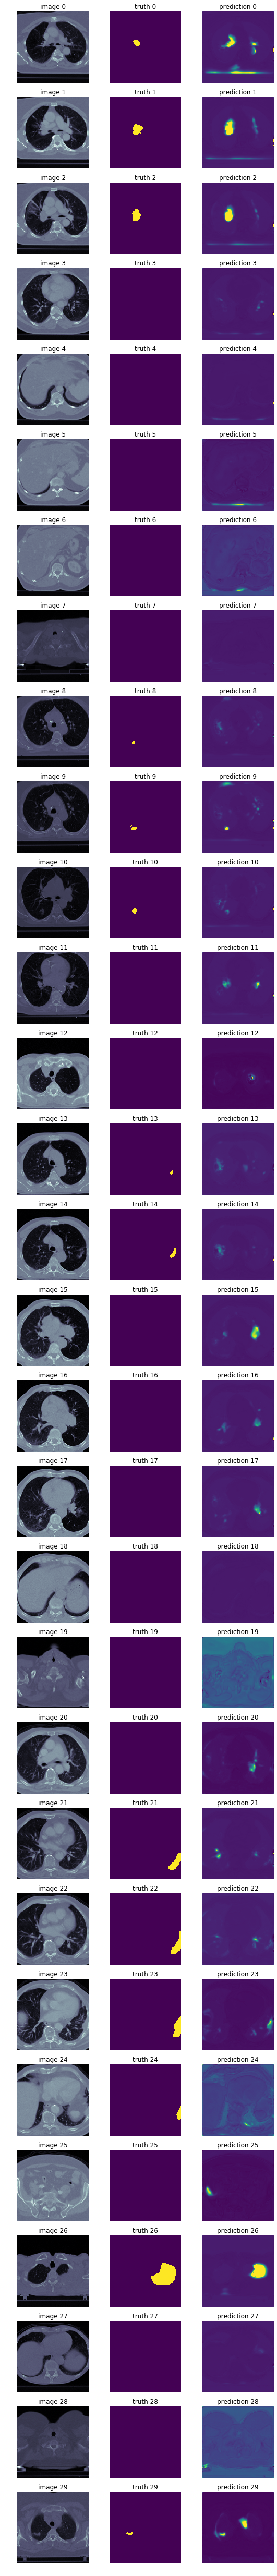

In [4]:
plotResults("datasets/data4/test/image/","datasets/data4/test/label/","datasets/data4/test/label/")